In [3]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#### load the automobile dataset and create their dataframes

car_df = pd.read_csv('automobile.txt')
print(car_df.columns.tolist())


['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['symboling', 'normalized-losses', 'length','width', 'height', 'curb-weight','bore', 'stroke', 'compression-ratio'] from the data set as they will not be used in the analysis.

In [5]:
car_df.drop(['symboling', 'normalized-losses', 'length','width', 'height', 'curb-weight','bore', 'stroke', 'compression-ratio'], axis= 1, inplace= True)
car_df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,152,mpfi,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,109,mpfi,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,136,mpfi,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,ohc,four,141,mpfi,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,ohc,four,141,mpfi,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,ohcv,six,173,mpfi,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,ohc,six,145,idi,106,4800,26,27,22470


#### Remove any duplicate rows

In [6]:
car_df.drop_duplicates(inplace= True)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,dohc,four,130,mpfi,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,ohcv,six,152,mpfi,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,ohc,four,109,mpfi,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,ohc,five,136,mpfi,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,ohc,four,141,mpfi,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,ohc,four,141,mpfi,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,ohcv,six,173,mpfi,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,ohc,six,145,idi,106,4800,26,27,22470


#### Missing Data

In [7]:

# Display any rows with empty values 
car_df[car_df.isnull().any(axis=1)]



,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,engine-type,num-of-cylinders,engine-size,fuel-system,horsepower,peak-rpm,city-mpg,highway-mpg,price


There are no rows with blank entires so we dont need to remove any, but there are entries that have '?'

In [8]:
## Replace all entries of '?' with none so we can then drop those rows

car_df.replace('?', None, inplace = True)
# display rows with empty data
car_df[car_df.isnull().any(axis=1)]

#drop rows from data set
car_df.dropna(inplace= True)


We have removed any missing data from the data set

In [9]:
# Check data types of columns
car_df.dtypes

make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base          float64
engine-type          object
num-of-cylinders     object
engine-size           int64
fuel-system          object
horsepower           object
peak-rpm             object
city-mpg              int64
highway-mpg           int64
price                object
dtype: object

Price, peak-rpm and horsepower are integers so they need changing

In [10]:
# Change data type to int
car_df = car_df.astype({'price': 'int64', 'peak-rpm' : 'int64', 'horsepower': 'int64'})

### Now onto the exploration

#### Identify relationships between variables / features


[Text(0.5, 0, 'Count'), Text(0.5, 1.0, 'Number of cars for each make')]

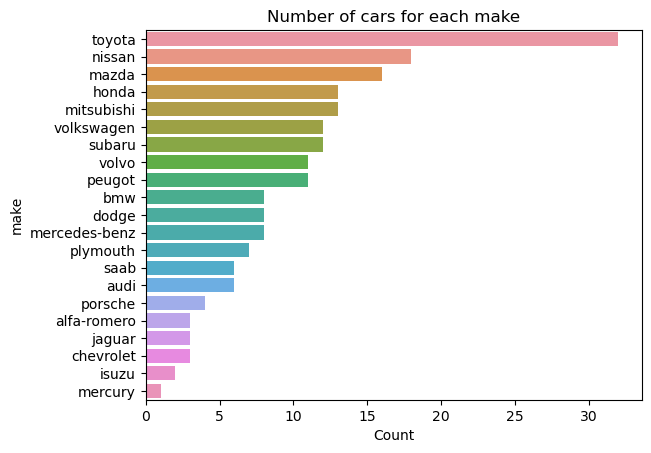

In [11]:
# Group by car makes and then plot graph

car_makes = car_df.groupby('make').count()
# Take first column as they are all the same
car_makes = car_makes.iloc[:,0]
car_makes = car_makes.reset_index()
# Sort values so most common is first
car_makes = car_makes.sort_values(by= 'fuel-type', ascending = False)
sns.barplot(data = car_makes, x= 'fuel-type', y= 'make').set(xlabel = 'Count', title= 'Number of cars for each make')

Toyota is the most common car make with over 30 cars and mercury is the least common

[Text(0.5, 1.0, 'Average price of a car for each make')]

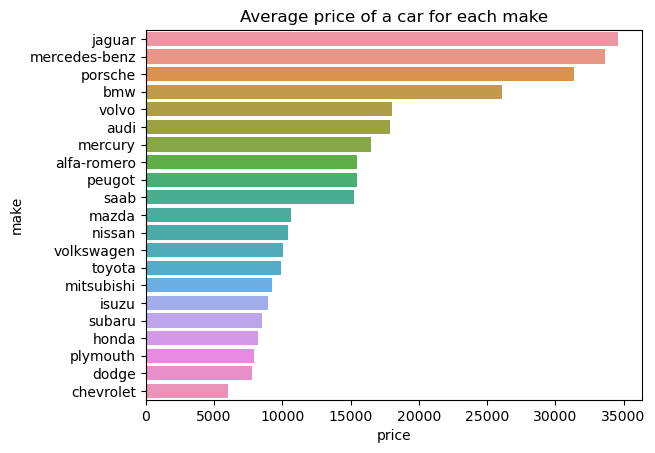

In [19]:
# group by makes and take an average
avg_price  = car_df.groupby('make').mean().reset_index().sort_values(by= 'price', ascending = False)

# plot the average price of cars by make
sns.barplot(data= avg_price, x='price', y= 'make').set(title='Average price of a car for each make')

<AxesSubplot:xlabel='city-mpg', ylabel='make'>

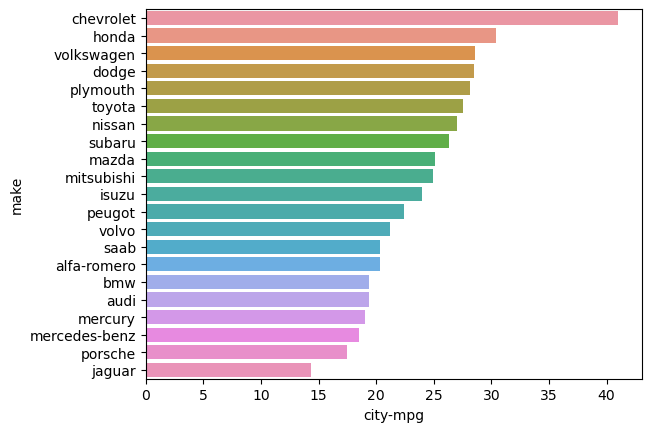

In [25]:
# sort values by efficiency and plot graph of efficiency and make
avg_mpg = avg_price.sort_values(by='city-mpg', ascending = False)

sns.barplot(data= avg_mpg, x='city-mpg', y='make')

[Text(0.5, 1.0, 'Graph showing the impact of the efficiency of the car on the price')]

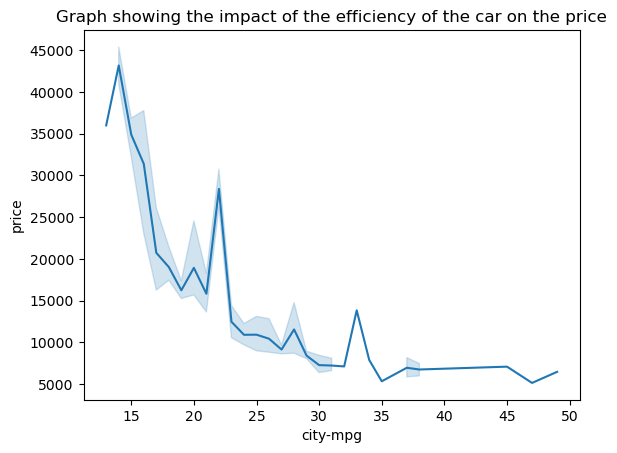

In [43]:
# plot of price and city-mpg
sns.lineplot(data= car_df, y='price', x='city-mpg').set(title= 'Graph showing the impact of the efficiency of the car on the price')

[Text(0.5, 1.0, 'Graph showing the impact of horsepower on the efficiency')]

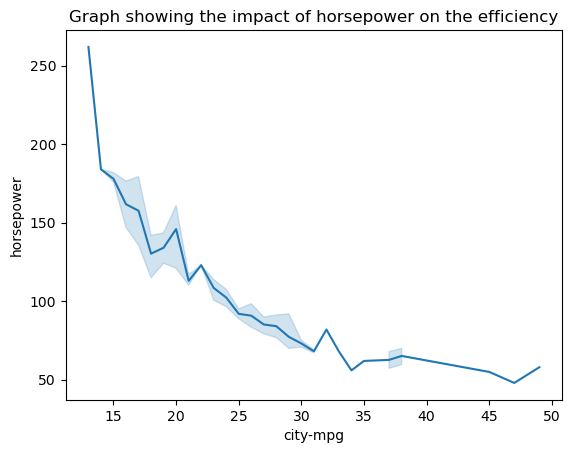

In [49]:
#plot efficiency agains horsepower
sns.lineplot(data= car_df, x= 'city-mpg', y= 'horsepower').set(title = 'Graph showing the impact of horsepower on the efficiency')

<AxesSubplot:xlabel='city-mpg', ylabel='body-style'>

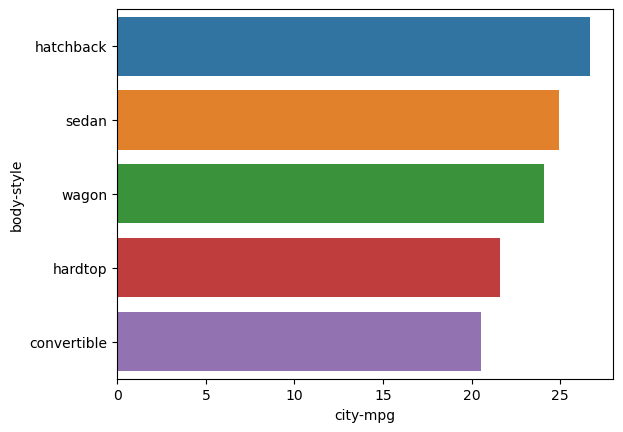

In [55]:
# group by body style and then plot bar graph of average city-mpg

body_avg = car_df.groupby('body-style').mean().reset_index().sort_values(by='city-mpg', ascending = False)
sns.barplot(data= body_avg, x='city-mpg', y='body-style')